## Exoplanet Database Breakout Coding

*Python for Data Science Seminar (2018-2022; UC Berkeley, Josh Bloom)*

There are now thousands of planets detected and cateorgized outside of our Solar System. These exoplanets show a huge diversity of properties.

In this breakout, we'll play with some of the current exoplanet data by creating, and populating an SQLite database.

### 1. Create an SQLite database to hold the information contained in the exoplanets CSV file

This CSV file ("exoplanet.eu_catalog.csv") was downloaded from http://exoplanet.eu/catalog/

Make sure that your DB has at least the following columns:
  `name`, `mass`, `radius`, `star_distance`, `star_mass`, `star_radius`, `discovered`

In [1]:
import pandas as pd
df = pd.read_csv("exoplanet.eu_catalog.csv")

In [41]:
import sqlite3

!rm exoplanets.db

connection = sqlite3.connect("exoplanets.db")

cursor = connection.cursor()

sql_cmd = """CREATE TABLE planets (name TEXT PRIMARY KEY,
    mass FLOAT, radius FLOAT, star_distance FLOAT, star_mass FLOAT, star_radius FLOAT,
    discovered FLOAT)"""

cursor.execute(sql_cmd)

### 2. Now populate the database with information from the CSV file

Note: a Python None is the same as a Null in SQLite. You'll need to recast your data contained in a pandas dataframe like

```python
df = df.where(pd.notnull(df), None)
```

You'll want to the use questionmark style of inserts here to make sure that you're properly adding in the None values. See the example at https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor.execute

In [42]:
df = df.where(pd.notnull(df),None)

In [43]:
for i,row in df.iterrows():
    sql_cmd = """INSERT INTO planets (name, mass, radius, star_distance, 
                star_mass, star_radius, discovered) VALUES (?,?,?,?,?,?,?)"""
    cursor.execute(sql_cmd,(row['# name'], row.mass, row.radius,row.star_distance, row.star_mass, row.star_radius, row.discovered))

    

### 3. Query the database and plot the mass versus discovery year. Notice any trends?


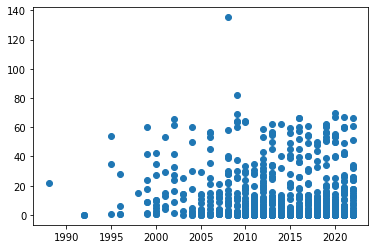

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

sql_cmd = "SELECT discovered,mass FROM planets WHERE mass is not Null"
rez = pd.read_sql_query(sql_cmd, connection)

plt.scatter(rez.discovered,rez.mass)
# connection.commit()
# connection.close()

### 4. (optional) Sketch out an example schema for a new DB which has three tables

One for the planet info (as above), one for the basic information about the star type that hosts the exoplanet (this will be instead of the `star_sp_type` in the original CSV), and one for the telescope/satellite 
used discovered the planet.